<a href="https://colab.research.google.com/github/AlbinDavid/car_detection/blob/master/Car_and_parts_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and importing libraries for training custom dataset

In [1]:
!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__
'''Importing torch and torchvision'''

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 708.0MB 25kB/s 
     |████████████████████████████████| 5.9MB 21.8MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-59yl8n8i
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-59yl8n8i
     |████████████████████████████████| 276kB 9.1MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2-cp36-none-any.whl size=44576 sha256=944433f0442907631de57b9454df006f5e6b6e7770efdf8f6367bbb0162a962d
  Stored in directory: /tmp/pip-ephem-wheel-cache-xjmwkmet/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Creat

'Importing torch and torchvision'

In [2]:
'''Installing and importing libraries for finding text in number plate'''
!pip install pytesseract
!sudo apt install tesseract-ocr
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=ced4eac700cdedf392bac1e491e4b6027dd3764ee51c9c242fbca23256bb6076
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [3]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 9614 (delta 2), reused 4 (delta 2), pack-reused 9597
Receiving objects: 100% (9614/9614), 3.85 MiB | 17.36 MiB/s, done.
Resolving deltas: 100% (7048/7048), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 2.2MB 9.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Running setup.py develop for detectron2


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Custom dataset uploading

In [ ]:
'''
Datasets for car,car_sides and car_parts are manually annotated and created in the coco dataset format 
'''
!wget https://github.com/AlbinDavid/car_detection/raw/master/data.zip
!unzip data.zip > /dev/nully
!wget https://github.com/AlbinDavid/car_detection/raw/master/car_sides_detection.zip
!unzip car_sides_detection.zip > /dev/nully
!wget https://github.com/AlbinDavid/car_detection/raw/master/car_parts_detection.zip
!unzip car_parts_detection.zip > /dev/nully

--2020-12-21 01:51:40--  https://github.com/AlbinDavid/car_detection/raw/master/data.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AlbinDavid/car_detection/master/data.zip [following]
--2020-12-21 01:51:40--  https://raw.githubusercontent.com/AlbinDavid/car_detection/master/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17608214 (17M) [application/zip]
Saving to: ‘data.zip.1’

data.zip.1          100%[===================>]  16.79M  --.-KB/s    in 0.1s    

2020-12-21 01:51:40 (148 MB/s) - ‘data.zip.1’ saved [17608214/17608214]

replace data/images/Snapshot.png? [y]es, [n]o, [A]ll, [N]

In [ ]:
from detectron2.data.datasets import register_coco_instances
'''
registering the datasets
'''
register_coco_instances("car", {}, "./data/train.json", "./data/images")
register_coco_instances("car_sides",{},"car_sides_detection/labels_my-project-name_2020-12-19-10-02-41.json","./car_sides_detection/images")
register_coco_instances("car_parts",{},"car_parts_detection/car_parts_detection.json","./car_parts_detection/images")

AssertionError: ignored

In [ ]:
car = MetadataCatalog.get("car")
dataset_dicts = DatasetCatalog.get("car")
car_sides_detection = MetadataCatalog.get("car_sides")
dataset_dicts_2 = DatasetCatalog.get("car_sides")
car_parts_detection = MetadataCatalog.get("car_parts")
dataset_dicts_3 = DatasetCatalog.get("car_parts")

[12/21 01:54:14 d2.data.datasets.coco]: Loaded 15 images in COCO format from ./data/train.json
[12/21 01:54:14 d2.data.datasets.coco]: Loaded 15 images in COCO format from car_sides_detection/labels_my-project-name_2020-12-19-10-02-41.json
[12/21 01:54:14 d2.data.datasets.coco]: Loaded 15 images in COCO format from car_parts_detection/car_parts_detection.json


# Visualization of the datasets

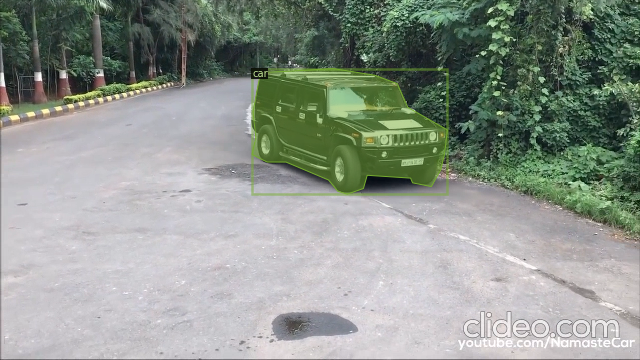

In [ ]:
import random

for d in random.sample(dataset_dicts, 1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=car, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

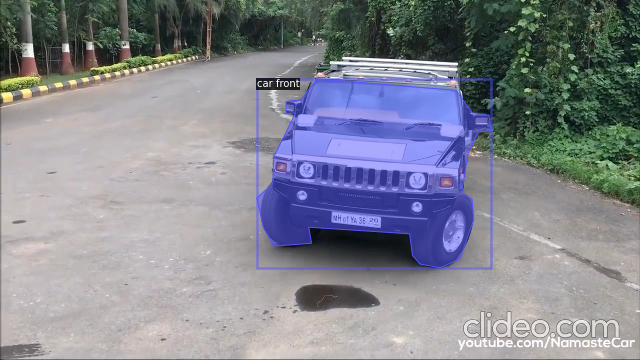

In [ ]:
for d in random.sample(dataset_dicts_2, 1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=car_sides_detection, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

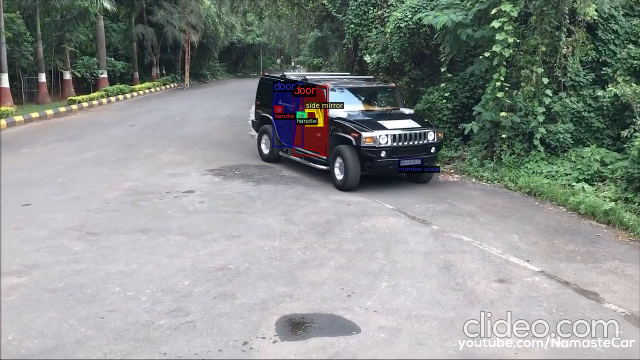

In [ ]:
for d in random.sample(dataset_dicts_3, 1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=car_parts_detection, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# Training the model


*   **cfg**   -model for detecting car
*   **cfg_2** - model for detecting sides of the car
*   **cfg_3** - model for detecting parts of the car 






In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("car",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 600    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # 3 classes (data, fig, hazelnut)
cfg.OUTPUT_DIR="./car_detection_model"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[12/21 02:04:21 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[12/21 02:04:21 d2.engine.train_loop]: Starting training from iteration 0
[12/21 02:04:32 d2.utils.events]:  eta: 0:05:00  iter: 19  total_loss: 1.415  loss_cls: 0.3946  loss_box_reg: 0.5052  loss_mask: 0.5474  loss_rpn_cls: 0.004883  loss_rpn_loc: 0.002363  time: 0.5206  data_time: 0.0202  lr: 0.00039962  max_mem: 4369M
[12/21 02:04:42 d2.utils.events]:  eta: 0:04:47  iter: 39  total_loss: 0.6665  loss_cls: 0.06395  loss_box_reg: 0.4889  loss_mask: 0.0954  loss_rpn_cls: 0.0004474  loss_rpn_loc: 0.002514  time: 0.5140  data_time: 0.0058  lr: 0.00079922  max_mem: 4369M
[12/21 02:04:52 d2.utils.events]:  eta: 0:04:38  iter: 59  total_loss: 0.2708  loss_cls: 0.02367  loss_box_reg: 0.186  loss_mask: 0.05703  loss_rpn_cls: 4.433e-05  loss_rpn_loc: 0.002567  time: 0.5116  data_time: 0.0055  lr: 0.0011988  max_mem: 4369M
[12/21 02:05:02 d2.utils.events]:  eta: 0:04:28  iter: 79  total_loss: 0.1839  loss_cls: 0.02362  loss_box_reg: 0.103  loss_mask: 0.05203  loss_rpn_cls: 7.621e-05  loss_rpn_l

In [ ]:
cfg_2 = get_cfg()
cfg_2.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg_2.DATASETS.TRAIN = ("car_sides",)
cfg_2.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg_2.DATALOADER.NUM_WORKERS = 2
cfg_2.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg_2.SOLVER.IMS_PER_BATCH = 2
cfg_2.SOLVER.BASE_LR = 0.02
cfg_2.SOLVER.MAX_ITER = 600    # 300 iterations seems good enough, but you can certainly train longer
cfg_2.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg_2.MODEL.ROI_HEADS.NUM_CLASSES = 4  # 3 classes (data, fig, hazelnut)

cfg_2.OUTPUT_DIR="./car_sides_detection_model"
os.makedirs(cfg_2.OUTPUT_DIR, exist_ok=True)
trainer_2 = DefaultTrainer(cfg_2)
trainer_2.resume_or_load(resume=False)
trainer_2.train()

In [ ]:
cfg_3 = get_cfg()
cfg_3.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg_3.DATASETS.TRAIN = ("car_parts",)
cfg_3.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg_3.DATALOADER.NUM_WORKERS = 2
cfg_3.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg_3.SOLVER.IMS_PER_BATCH = 2
cfg_3.SOLVER.BASE_LR = 0.02
cfg_3.SOLVER.MAX_ITER = 1000    # 300 iterations seems good enough, but you can certainly train longer
cfg_3.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg_3.MODEL.ROI_HEADS.NUM_CLASSES = 4  # 3 classes (data, fig, hazelnut)
cfg_3.OUTPUT_DIR = "./car_sides_detection_model"
os.makedirs(cfg_3.OUTPUT_DIR, exist_ok=True)
trainer_3 = DefaultTrainer(cfg_3)
trainer_3.resume_or_load(resume=False)
trainer_3.train()

In [ ]:
def crop_polygon(mask,im):
      '''
      for cropping the mask from the image and return with transparent background
      '''
        mask_val = np.asarray(mask,dtype=np.uint8)                   
        try:
            out1,cnts,val = cv2.findContours(mask_val, mode = cv2.RETR_CCOMP,method =cv2.CHAIN_APPROX_SIMPLE)
        except:
            cnts,val = cv2.findContours(mask_val,mode=cv2.RETR_CCOMP,method=cv2.CHAIN_APPROX_SIMPLE)
        cnt=cnts[0]
        rgba = cv2.cvtColor(im, cv2.COLOR_RGB2RGBA)  
        rects = cv2.boundingRect(cnt)
        x,y,w,h = rects
        croped_rgba = rgba[y:y+h, x:x+w].copy()
        poly_mask_rgba = np.zeros(croped_rgba.shape[:2],np.uint8)
        pts = cnt-cnt.min(axis=0)
        cv2.drawContours(poly_mask_rgba,[pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
        try:
            poly_bound_rgba = cv2.bitwise_and(croped_rgba,croped_rgba,mask=poly_mask_rgba)
        except:
            pass
        bg_rgba = np.ones_like(croped_rgba,np.uint8) *255
        bg_rgba[:,:,3] = 0
        cv2.bitwise_not(bg_rgba,bg_rgba,mask=poly_mask_rgba)
        p_s = poly_bound_rgba.shape[:2]
        trans_bg_img = bg_rgba + poly_bound_rgba
        return trans_bg_img

# Loading the custom trained model

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("car", )
predictor = DefaultPredictor(cfg)

In [ ]:
cfg_2.MODEL.WEIGHTS = os.path.join(cfg_2.OUTPUT_DIR, "model_final.pth")
cfg_2.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg_2.DATASETS.TEST = ("car_sides", )
predictor_2 = DefaultPredictor(cfg_2)

In [ ]:
cfg_3.MODEL.WEIGHTS = os.path.join(cfg_3.OUTPUT_DIR, "model_final.pth")
cfg_3.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg_3.DATASETS.TEST = ("car_parts", )
predictor_3 = DefaultPredictor(cfg_3)

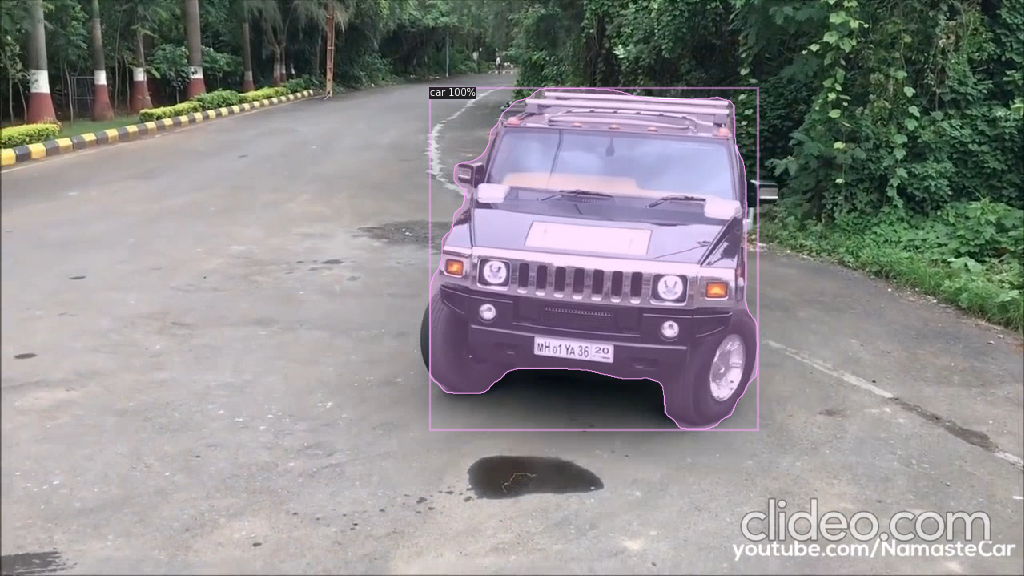

[0]


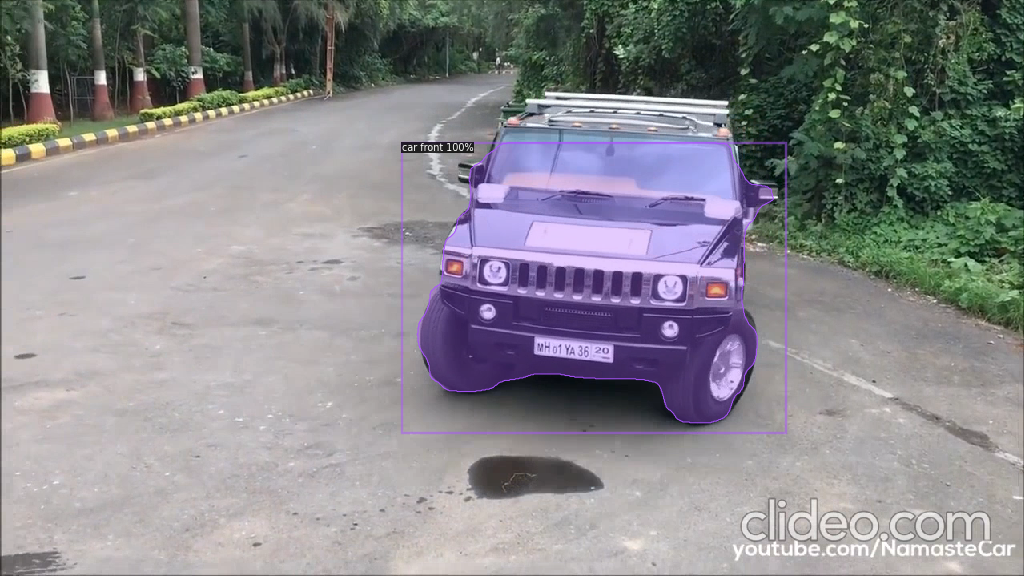

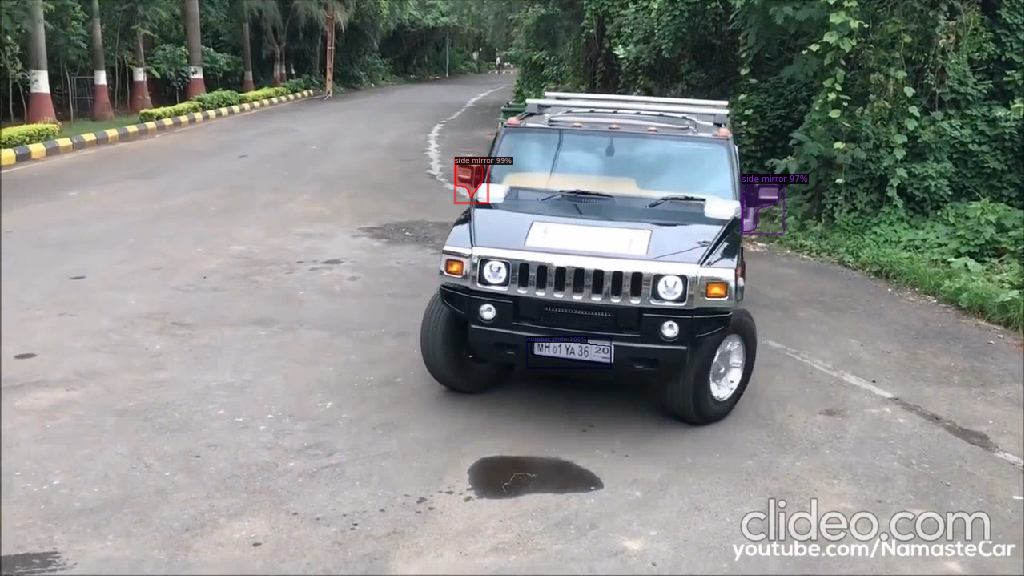

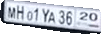

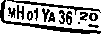

Extracted Info :  aH ol Ya gg"2O



In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 1):
    # filename="./data/images/Snapshot_11.png"  #number plate is visible in this image 
    im = cv2.imread(d["file_name"])
    # im = cv2.imread(filename) # uncomment if loading the image with number plate
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=car, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])
    car_masks = outputs["instances"].pred_masks.cpu().numpy()
    image_classes = outputs["instances"].pred_classes.cpu().numpy()
    print(image_classes)
    for i in range(len(image_classes)):
        #'0' belongs to the "car" class 
        if image_classes[i]==0:
            outputs = predictor_2(im)
            v = Visualizer(im[:, :, ::-1],
                          metadata=car_sides_detection, 
                          scale=0.8, 
                          instance_mode=ColorMode.IMAGE_BW   
            )
            v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
            cv2_imshow(v.get_image()[:, :, ::-1])

            mask = outputs["instances"].pred_masks.cpu().numpy()
            sides_output = outputs["instances"].pred_classes.cpu().numpy()
            for i in range(len(sides_output)):
                #'0' and '1' belongs to front and rear sides of the car
                if sides_output[i]==0 or sides_output[i]==1:
                    
                    outputs = predictor_3(im)
                    v = Visualizer(im[:, :, ::-1],
                                    metadata=car_parts_detection, 
                                    scale=0.8, 
                                    instance_mode=ColorMode.IMAGE_BW   
                      )
                    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
                    cv2_imshow(v.get_image()[:, :, ::-1])
                    parts_masks = outputs["instances"].pred_masks.cpu().numpy()
                    parts_classes = outputs["instances"].pred_classes.cpu().numpy()
                    for i in range(len(parts_classes)):
                        #Number plate belongs to class '2'
                        if parts_classes[i]==2:
                          number_plate_mask = crop_polygon(parts_masks[i],im)
                          cv2_imshow(number_plate_mask)
                          img = cv2.cvtColor(number_plate_mask, cv2.COLOR_BGR2GRAY) 
                          thres = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
                          cv2_imshow(thres)
                          extractedInformation = pytesseract.image_to_string(thres)
                          print("Extracted Info : ",extractedInformation)
                else:
                    outputs = predictor_3(im)
                    v = Visualizer(im[:, :, ::-1],
                                    metadata=car_parts_detection, 
                                    scale=0.8, 
                                    instance_mode=ColorMode.IMAGE_BW  
                      )
                    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
                    cv2_imshow(v.get_image()[:, :, ::-1])
                    parts_masks = outputs["instances"].pred_masks.cpu().numpy()
                    parts_classes = outputs["instances"].pred_classes.cpu().numpy()
                    for i in range(len(parts_classes)):
                        part_mask = crop_polygon(parts_masks[i],im)
                        cv2_imshow(part_mask)

# Codes for downloading the weights (just for reference)

In [ ]:
from google.colab import files
f = open('car_detection_model.yml', 'w')
f.write(cfg.dump())
f.close()
files.download('car_detection_model.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
f = open('/content/gdrive/My Drive/config.yml', 'w')
f.write(cfg.dump())
f.close()